<a href="https://colab.research.google.com/github/Charish53/Akridata/blob/main/Copy_of_Akridata_ML_Intern_Sep25_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook contains the coding assignment for Akridata's ML internships (September 2025).

  * [Job description](https://docs.google.com/document/d/e/2PACX-1vRwHkY0TLebdoe-meFsgM3p3DdReJq5Kl1fVN5-tHZrYEuXwo7vYvbIkxa2oQNH4D26Hsv9wP7Mup1l/pub)
  * [Application form](https://docs.google.com/forms/d/e/1FAIpQLSdTW9OQXXlHkjKCcxgil4H3BgwPvOrlnqzL0JsqBh5xyAK0aQ/viewform?usp=dialog)

## Why This Assignment Exists

We receive far more applications than we can meaningfully review — it's too easy to click “Apply” online. That flood inevitably includes many who aren't a fit for the role. We don't want to filter by college names or grades alone.

So we add **a bit of friction**: a real, hands-on task. Yes, it's extra work — but it's a better signal than a resume or a keyword-stuffed LinkedIn profile.

We've picked something that:
- Is technically straightforward to complete in a reasonable time.
- Is interesting and directly relevant to the problems we solve.
- Gives you a taste of how we actually work.

You are free to use any tools (Google, Forums, Cursor, GenAI) you want to complete this assignment - as long as you do it yourself. You must understand what you do though. We may quiz you on this if you get shortlisted.

## Publishing Your Code

Once the interview process wraps up, we encourage you to publish your solution and add it to your portfolio. Until then, please keep it private so everyone gets a fair shot.

## The Task: Defect Classification

At Akridata, we focus on the **critical edge cases of manufacturing inspection** — where failures are costly, dangerous, or both.  
Think precision lenses and glass components that could shatter, ball bearings that can fail in high-stress machinery, or kilometers of railway track that no human can realistically inspect end-to-end. We also handle inspection problems where rules-based computer vision falls short — like detecting subtle miswirings in cable assemblies, spotting PCB defects in complex layouts, or checking extremely small parts where manual inspection is painfully slow.

This task gives you a glimpse into vision-based inspection work.  
You'll tackle **zero-shot defect classification** for a real-world-like case: detecting surface defects in hazelnut images from the MVTec-AD dataset, using OpenAI's `CLIP` vision-language model.


# IMPORTANT

## Before proceeding, copy this notebook into your Google Drive, and make changes to your local copy.

You have to share the link to your local copy.

# Zero-Shot Defect Classification with CLIP (Git + Colab Workflow)

Everything you have to do is templated in the notebook. We provide an overview here; but go through the rest of the notebook before you start coding.


## Overview

In this assignment, you will:
- Use OpenAI's CLIP model to perform zero-shot defect classification on the `hazelnut` subset of the MVTec-AD dataset (test split).
- Implement a configuration class (Pydantic) and a classification function in Python.
- Practice basic Git workflows: branching, committing, merging, and preserving commit history.
- Run your completed code on real image data and produce a confusion matrix.

All work must be done entirely inside this Colab notebook, including:
- Running Git commands
- Editing files in the cloned repository
- Installing and importing packages

We will run the code in this notebook to verify the submission.

*The cells marked as 'TO DO' are the ones where you have to edit code (or text).*


## References
- [CLIP](https://github.com/openai/CLIP)
- [MVTec-AD](https://www.mvtec.com/company/research/datasets/mvtec-ad)
- [Pydantic](https://docs.pydantic.dev/latest/)
- [CLIP-AC (WinCLIP)](https://arxiv.org/abs/2303.14814)
  - See section 4.1 in the WinCLIP paper for a
    basic two-class design for anomaly classification.
  - Extend this to a defect classification problem for multiple defect classes for this task.
  - **Note:** Section 4.1 in the WinCLIP paper does *anomaly classification* only; i.e., separate normal images from defective images. It **does not** discriminate the different types of defects. Your task is to classify good as well as different defect types. For example, the class names for some problem will be ['good', 'broken', 'bent', 'cut', etc.]. These are **not** the class names for the current problem - just as an example for the defect classification task.

# Download and extract dataset

In [ ]:
#@title Download a the dataset sample from Supervisely
!curl https://assets.supervisely.com/supervisely-supervisely-assets-public/teams_storage/W/6/pt/ANAGVgKaC62tTrDQWK5JhNP2dd8ynqaTKSM1QdVoAasmTdaLvBwCuW7nCrq9o9lLS2padKnV9QogVGFlEPg7vxEBPIfuFC2Yq7ELNW7xn2t1egLrQPoGpNFJobhh.tar --output mvtec.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  548M  100  548M    0     0  15.3M      0  0:00:35  0:00:35 --:--:-- 16.3M


In [ ]:
#@title Extract the tarball 'mvtec.tar' and look for test images for the hazelnut subset
!tar -xf mvtec.tar
!ls test/img/hazelnut_*

tar: Removing leading `/' from member names
test/img/hazelnut_crack_002.png  test/img/hazelnut_print_004.png
test/img/hazelnut_cut_003.png	 test/img/hazelnut_print_005.png
test/img/hazelnut_good_023.png	 test/img/hazelnut_print_006.png
test/img/hazelnut_good_037.png	 test/img/hazelnut_print_007.png
test/img/hazelnut_hole_005.png	 test/img/hazelnut_print_009.png
test/img/hazelnut_hole_010.png	 test/img/hazelnut_print_011.png
test/img/hazelnut_hole_013.png	 test/img/hazelnut_print_012.png
test/img/hazelnut_hole_016.png	 test/img/hazelnut_print_013.png
test/img/hazelnut_print_003.png  test/img/hazelnut_print_016.png


# Clone the repo

This is the repo to clone:

https://github.com/akridata-ai/ZS-CLIP-AC-naive

In [ ]:
#@title TO DO: Clone the Git repo here, in the Colab runtime
# Clones the public template repo into /content
!git clone https://github.com/akridata-ai/ZS-CLIP-AC-naive.git


Cloning into 'ZS-CLIP-AC-naive'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 12 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), done.
Resolving deltas: 100% (2/2), done.


In [ ]:
#@title Configure git user
!git config --global user.email "test-user@email.com"
!git config --global user.name "Test User"

In [ ]:
#@title Move to the repo for subsequent work
%cd /content/ZS-CLIP-AC-naive

/content/ZS-CLIP-AC-naive


In [ ]:
#@title TO DO: Checkout the EXISTING feature branch in the repository. What's it called? How do you find the names of existing branches?
# DO NOT create a new branch!
# Fetch and show all local + remote branches
!git fetch --all --prune
!git branch -a


Fetching origin
* feature/template-code
  main
  remotes/origin/HEAD -> origin/main
  remotes/origin/feature/template-code
  remotes/origin/main


In [ ]:
!git checkout feature/template-code
!git status
!git branch


M	README.md
M	clip_ac.py
M	spec.py
Already on 'feature/template-code'
Your branch is up to date with 'origin/feature/template-code'.
On branch feature/template-code
Your branch is up to date with 'origin/feature/template-code'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   README.md
	modified:   clip_ac.py
	modified:   spec.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	LICENSE.md
	ZS-CLIP-AC-naive/
	meta.json
	mvtec.tar
	test/
	train/

no changes added to commit (use "git add" and/or "git commit -a")
* feature/template-code
  main


In [ ]:
#@title Verify that the files appear here
!ls

clip_ac.py  LICENSE.md	mvtec.tar  requirements.txt  test   ZS-CLIP-AC-naive
data	    meta.json	README.md  spec.py	     train


In [ ]:
# list contents of the repo
!ls

# list inside test folder
!ls test | head

# list some files from test/img (hazelnut subset lives here)
!ls test/img | head

!ls /content/test/img/hazelnut* | head



clip_ac.py  LICENSE.md	mvtec.tar  requirements.txt  test   ZS-CLIP-AC-naive
data	    meta.json	README.md  spec.py	     train
ann
img
bottle_broken_large_001.png
bottle_broken_large_002.png
bottle_broken_large_005.png
bottle_broken_large_006.png
bottle_broken_large_008.png
bottle_broken_large_009.png
bottle_broken_large_011.png
bottle_broken_large_013.png
bottle_broken_large_014.png
bottle_broken_large_018.png
/content/test/img/hazelnut_crack_002.png
/content/test/img/hazelnut_cut_003.png
/content/test/img/hazelnut_good_023.png
/content/test/img/hazelnut_good_037.png
/content/test/img/hazelnut_hole_005.png
/content/test/img/hazelnut_hole_010.png
/content/test/img/hazelnut_hole_013.png
/content/test/img/hazelnut_hole_016.png
/content/test/img/hazelnut_print_003.png
/content/test/img/hazelnut_print_004.png


In [ ]:
#@title Move images for the hazelnut subset from the test split to the `data` folder in the repository
# Move hazelnut images into the repo's data folder
!cp /content/ZS-CLIP-AC-naive/test/img/hazelnut_* data/


In [ ]:
!ls data | head


hazelnut_crack_002.png
hazelnut_cut_003.png
hazelnut_good_023.png
hazelnut_good_037.png
hazelnut_hole_005.png
hazelnut_hole_010.png
hazelnut_hole_013.png
hazelnut_hole_016.png
hazelnut_print_003.png
hazelnut_print_004.png


In [ ]:
#@title Install the requirements from the `requirements.txt` file
!pip install -qr requirements.txt

  Preparing metadata (setup.py) ... done


# Implementation

Go through the [CLIP github repo](https://github.com/openai/CLIP) to understand zero-shot classification. Go through section 4.1 in the [WinCLIP paper](https://arxiv.org/abs/2303.14814) to understand zero-shot anomaly classification; they call this `CLIP-AC`.

Your task is to extend anomaly classification (just normal vs defective) to do defect classification (normal vs different categories of defects) using the CLIP model.

Your model should predict non-defective images as "good". For defective images, the defect category should be predicted as the class name. See the image filenames to know the defect categories; or see the [MVTec-AD dataset details](https://openaccess.thecvf.com/content_CVPR_2019/papers/Bergmann_MVTec_AD_--_A_Comprehensive_Real-World_Dataset_for_Unsupervised_Anomaly_CVPR_2019_paper.pdf). This task is only for the `hazelnut` subset.

Note that the 'clip' package from OpenAI is installed as part of the requirements in the previous cell.

In [ ]:
%%writefile spec.py
"""
Configuration spec for defect classification using CLIP.
Only holds configuration; no execution logic.
"""

from typing import List
from pydantic import BaseModel, Field


class DefectClassificationSpec(BaseModel):
    """
    Specification for defect classification with CLIP.

    Attributes:
        class_names (List[str]): Predicted classes ("good" + defect types).
        prompts (List[str]): Natural-language prompts aligned to class_names.
        model_name (str): CLIP backbone to load.
    """

    class_names: List[str] = Field(
        default_factory=lambda: ["good", "crack", "cut", "hole", "print"],
        description="Classes for hazelnut defect classification."
    )

    prompts: List[str] = Field(
        default_factory=lambda: [
            "a high-quality studio photo of a perfect hazelnut without any defects",
            "a photo of a hazelnut with a crack defect on the shell",
            "a photo of a hazelnut that is cut or sliced (cut defect)",
            "a photo of a hazelnut with a hole defect on the shell",
            "a photo of a hazelnut with printed or stamped white text on the shell (print defect)",
        ],
        description="Prompts corresponding 1:1 with class_names."
    )

    model_name: str = Field(
        default="ViT-B/32",  # you can try "ViT-L/14" in the rerun cell
        description="CLIP model variant to be used."
    )

    def get_prompt_for_class(self, class_name: str) -> str:
        """Return the natural-language prompt for a given class name."""
        if class_name not in self.class_names:
            raise ValueError(f"Class '{class_name}' not found in spec.")
        idx = self.class_names.index(class_name)
        return self.prompts[idx]

    def validate_alignment(self) -> None:
        """Quick sanity check to avoid silent misalignment bugs."""
        if len(self.class_names) != len(self.prompts):
            raise ValueError(
                f"class_names ({len(self.class_names)}) and prompts "
                f"({len(self.prompts)}) must have the same length."
            )


Overwriting spec.py


In [ ]:
#@title TO DO: Modify `clip_ac.py` and save its contents
%%writefile clip_ac.py
"""
Zero-shot defect classification using CLIP
"""

import clip
import torch
from PIL import Image
from pathlib import Path
from typing import List, Tuple
from spec import DefectClassificationSpec

def classify_defects(spec: DefectClassificationSpec, test_dir: Path) -> Tuple[List[str], List[str]]:
    """
    Zero-shot defect classification using CLIP.

    Args:
        spec: Pydantic spec containing prompts and model name.
        test_dir: Path to the test dataset root.
                For this task, we expect filenames to indicate the ground-truth label.
                E.g. `hazelnut_print_*.png` indicates an image with the 'print' defect class.
                There are a few other kinds of defects too; find these from the file names.
                `hazelnut_good_*.png` indicates an image of the good/normal class.

    Returns:
        y_true: list of ground-truth labels
        y_pred: list of predicted labels
    """
    # Load model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(spec.model_name, device=device)

    # TODO: Load images and labels from test_dir
    # TODO: Encode text prompts for all the classes
    # TODO: Compare image features to text features, choose predicted label
    # TODO: Return lists y_true and y_pred
    raise NotImplementedError("Classification logic not implemented yet.")

Overwriting clip_ac.py


In [ ]:
%%writefile clip_ac.py
"""
Zero-shot defect classification using CLIP with:
- Robust filename parsing (token/regex + synonyms)
- Two-stage pipeline (good vs defective → defect type)
- Prompt ensembling
- Learned temperature (logit_scale)
- Simple TTA (horizontal flip)
- Tunable defective threshold (tau)
"""

from pathlib import Path
from typing import List, Tuple, Dict
import re

import torch
import clip
from PIL import Image

from spec import DefectClassificationSpec


# ---------------------------- utils ----------------------------

_WORD_SPLIT = re.compile(r"[_\-\s]+")

SYN_TO_CANON: Dict[str, str] = {
    # canonical
    "good": "good",
    "crack": "crack",
    "cut": "cut",
    "hole": "hole",
    "print": "print",
    # common variants in filenames
    "cracked": "crack",
    "cracking": "crack",
    "printed": "print",
    "printing": "print",
    "perforation": "hole",
    "perforated": "hole",
    "sliced": "cut",
    "slice": "cut",
    # avoid false positives like "uncut"
    # handled by token matching instead of substring
}

def _stem_to_label(stem: str, class_names: List[str]) -> str:
    """
    Robustly extract label from filename stem using token-based matching and synonyms.
    Expects patterns like: hazelnut_<label>_*.png
    """
    tokens = [t for t in _WORD_SPLIT.split(stem.lower()) if t]
    # try direct canonical
    for t in tokens:
        if t in class_names:
            return t
    # try synonyms → canonical
    for t in tokens:
        if t in SYN_TO_CANON and SYN_TO_CANON[t] in class_names:
            return SYN_TO_CANON[t]
    # last resort: if next token after "hazelnut" exists, use it when it’s known
    if "hazelnut" in tokens:
        idx = tokens.index("hazelnut")
        if idx + 1 < len(tokens):
            nxt = tokens[idx + 1]
            if nxt in class_names:
                return nxt
            if nxt in SYN_TO_CANON and SYN_TO_CANON[nxt] in class_names:
                return SYN_TO_CANON[nxt]
    return ""  # unknown


def _dedup(seq: List[str]) -> List[str]:
    seen, out = set(), []
    for s in seq:
        s = s.strip()
        if s and s not in seen:
            seen.add(s)
            out.append(s)
    return out


def _build_variants(cname: str, base_prompt: str) -> List[str]:
    """Generate diverse paraphrases per class."""
    TEMPLATES = [
        "a photo of {}",
        "a close-up photo of {}",
        "a macro photo of {}",
        "a studio photo of {}",
        "a product photo of {}",
        "an image of {}",
        "a detailed photo of {}",
    ]

    if cname == "good":
        base = [
            "a perfect hazelnut without any defects",
            "a hazelnut with no defects on the shell",
            "a clean, undamaged hazelnut",
            "a hazelnut with no crack, no cut, no hole, no print",
        ]
    else:
        syn = {
            "crack": [
                "a hazelnut with a crack on the shell",
                "a cracked hazelnut shell",
                "a hazelnut showing a thin fracture line on the shell",
            ],
            "cut": [
                "a hazelnut that is cut or sliced",
                "a hazelnut with a cut defect",
                "a hazelnut shell showing a sharp cut",
            ],
            "hole": [
                "a hazelnut with a hole defect on the shell",
                "a hazelnut shell having a hole",
                "a hazelnut showing a circular perforation on the shell",
            ],
            "print": [
                "a hazelnut with printed or stamped text on the shell",
                "a hazelnut shell with printed markings",
                "a hazelnut showing printed letters or digits on the shell",
            ],
        }
        base = syn.get(cname, [base_prompt])

    variants = [base_prompt] + base
    for s in base:
        for t in TEMPLATES:
            variants.append(t.format(s))
    return _dedup(variants)


def _encode_text_ensemble(model, device, variants: List[str]) -> torch.Tensor:
    with torch.no_grad():
        toks = clip.tokenize(variants).to(device)
        feats = model.encode_text(toks)                # [V, D]
        feats = feats / feats.norm(dim=-1, keepdim=True)
        mean = feats.mean(dim=0)                       # [D]
        mean = mean / mean.norm()
        return mean


def _encode_image_tta(model, preprocess, device, img: Image.Image) -> torch.Tensor:
    """Average features of original and horizontal flip."""
    with torch.no_grad():
        x = preprocess(img.convert("RGB")).unsqueeze(0).to(device)  # [1,3,H,W]
        x_flip = torch.flip(x, dims=[-1])                           # horizontal flip
        f1 = model.encode_image(x)                                  # [1,D]
        f2 = model.encode_image(x_flip)                             # [1,D]
        f = (f1 + f2) / 2.0
        f = f / f.norm(dim=-1, keepdim=True)
        return f  # [1,D]


# ---------------------------- main API ----------------------------

def classify_defects(
    spec: DefectClassificationSpec,
    test_dir: Path,
    tau: float = 0.65  # binary threshold: prob(defective) >= tau → defective
) -> Tuple[List[str], List[str]]:
    """
    Two-stage CLIP zero-shot:
      Stage-1: good vs defective (binary, threshold tau)
      Stage-2: if defective → classify into {crack, cut, hole, print}
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(spec.model_name, device=device)
    model.eval()

    # Learned temperature
    with torch.no_grad():
        logit_scale = model.logit_scale.exp()

    # ---------- Stage-1: binary (good vs defective) ----------
    good_variants = _build_variants("good", spec.get_prompt_for_class("good"))
    defective_variants = _dedup([
        "a hazelnut with any visible defect on the shell",
        "a defective hazelnut",
        "a hazelnut with damage or anomaly on the shell",
        "a hazelnut that is not perfect (has a defect)",
        "a hazelnut with a crack or cut or hole or print",
        "a hazelnut showing damage such as crack, cut, hole, or printed text",
    ])

    with torch.no_grad():
        good_feat = _encode_text_ensemble(model, device, good_variants)           # [D]
        defective_feat = _encode_text_ensemble(model, device, defective_variants) # [D]
        bin_text = torch.stack([good_feat, defective_feat], dim=0)                # [2,D]

    # ---------- Stage-2: multiclass among defects ----------
    defect_names = [c for c in spec.class_names if c != "good"]
    per_class_feats = []
    with torch.no_grad():
        for cname in defect_names:
            base_prompt = spec.get_prompt_for_class(cname)
            variants = _build_variants(cname, base_prompt)
            per_class_feats.append(_encode_text_ensemble(model, device, variants))
        type_text = torch.stack(per_class_feats, dim=0)                           # [Cdef,D]

    # ---------- iterate images ----------
    y_true, y_pred = [], []
    for img_path in sorted(test_dir.glob("hazelnut_*.png")):
        stem = img_path.stem
        true_label = _stem_to_label(stem, spec.class_names)
        if not true_label:
            # skip unknown or malformed filename
            continue

        img = Image.open(img_path)
        with torch.no_grad():
            img_feat = _encode_image_tta(model, preprocess, device, img)          # [1,D]

            # Stage-1
            bin_logits = logit_scale * (img_feat @ bin_text.t())                  # [1,2]
            bin_probs = bin_logits.softmax(dim=-1).squeeze(0)                     # [2]
            p_good, p_def = bin_probs[0].item(), bin_probs[1].item()

            if p_def < tau:
                pred_label = "good"
            else:
                # Stage-2
                type_logits = logit_scale * (img_feat @ type_text.t())            # [1,Cdef]
                type_idx = type_logits.softmax(dim=-1).argmax(dim=-1).item()
                pred_label = defect_names[type_idx]

        y_true.append(true_label)
        y_pred.append(pred_label)

    return y_true, y_pred


Overwriting clip_ac.py


In [ ]:
# #@title TO DO: Run the defect classification code
# from pathlib import Path
# from spec import DefectClassificationSpec
# from clip_ac import classify_defects

# # Create the spec for the 'hazelnut' subset
# defect_spec = DefectClassificationSpec(...)  # Pass the right class names and prompts

# test_dir = Path("data")
# y_true, y_pred = classify_defects(defect_spec, test_dir)




In [ ]:
#title TO DO: Run the defect classification code
from pathlib import Path
from spec import DefectClassificationSpec
from clip_ac import classify_defects

# Create the spec for the 'hazelnut' subset (defaults already set in spec.py)
defect_spec = DefectClassificationSpec()

# Run classification
test_dir = Path("data")
y_true, y_pred = classify_defects(defect_spec, test_dir)

print("Number of test images:", len(y_true))
print("First 10 ground-truth labels:", y_true[:10])
print("First 10 predicted labels:", y_pred[:10])

Number of test images: 18
First 10 ground-truth labels: ['crack', 'cut', 'good', 'good', 'hole', 'hole', 'hole', 'hole', 'print', 'print']
First 10 predicted labels: ['crack', 'crack', 'crack', 'crack', 'crack', 'crack', 'crack', 'crack', 'crack', 'crack']


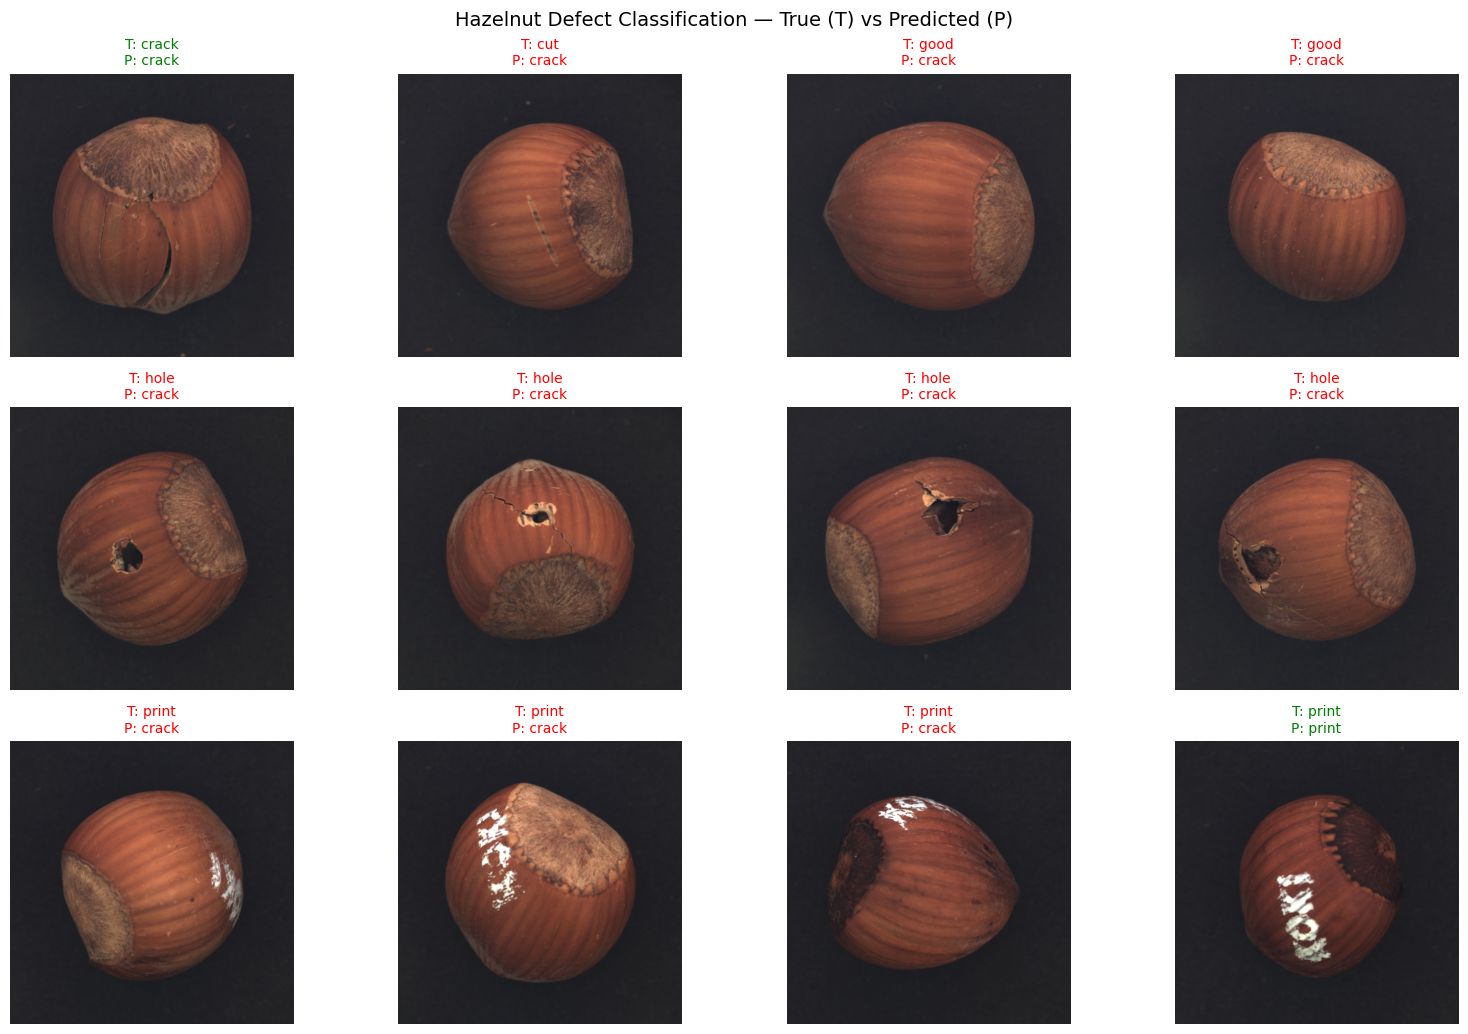

In [ ]:
import math
import matplotlib.pyplot as plt
from pathlib import Path

# collect paths and pair with labels
files = sorted(Path("data").glob("hazelnut_*.png"))
pairs = list(zip(files, y_true, y_pred))  # <-- make it sliceable

# how many to show
N = min(12, len(pairs))   # change 12 as you like
cols = 4
rows = math.ceil(N / cols)

plt.figure(figsize=(4*cols, 3.5*rows))

for i, (f, gt, pred) in enumerate(pairs[:N], start=1):
    img = plt.imread(f)
    ax = plt.subplot(rows, cols, i)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"T: {gt}\nP: {pred}",
                 fontsize=10,
                 color=("green" if gt == pred else "red"))

plt.suptitle("Hazelnut Defect Classification — True (T) vs Predicted (P)", fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
#@title TO DO: Print the confusion matrix using the predictions and ground truth labels

Accuracy: 0.1667

Classification Report:

              precision    recall  f1-score   support

        good     0.0625    1.0000    0.1176         1
       crack     0.0000    0.0000    0.0000         1
         cut     0.0000    0.0000    0.0000         2
        hole     0.0000    0.0000    0.0000         4
       print     1.0000    0.2000    0.3333        10

    accuracy                         0.1667        18
   macro avg     0.2125    0.2400    0.0902        18
weighted avg     0.5590    0.1667    0.1917        18



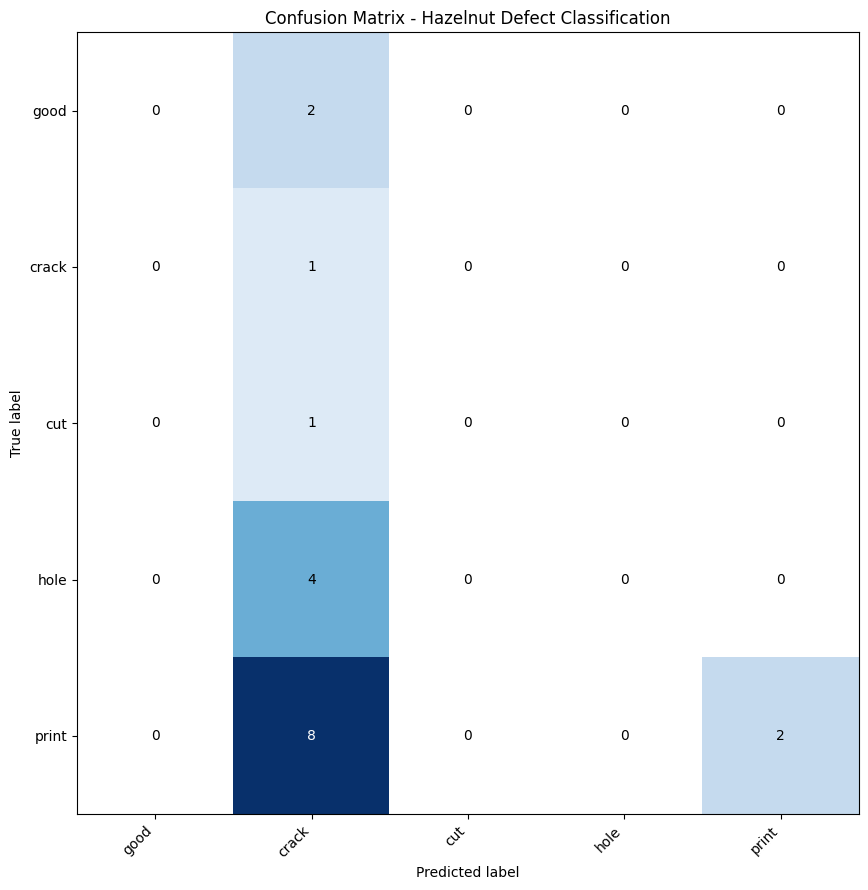

In [ ]:
# 5th cell — Evaluation with confusion matrix (zeros in white)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

labels = defect_spec.class_names  # consistent label order

if len(y_true) == 0:
    print("No test samples found. Make sure your 'data/' folder has 'hazelnut_*.png' files.")
else:
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    report = classification_report(y_true, y_pred, target_names=labels, digits=4, zero_division=0)

    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:\n")
    print(report)

    # Custom colormap: force zeros to white
    from matplotlib.colors import ListedColormap

    base_cmap = plt.cm.Blues(np.linspace(0, 1, 256))
    base_cmap[0] = [1, 1, 1, 1]  # RGBA white for zero
    cmap = ListedColormap(base_cmap)

    fig, ax = plt.subplots(figsize=(1.2*len(labels)+4, 1.2*len(labels)+3))
    im = ax.imshow(cm, cmap=cmap)
    ax.set_title("Confusion Matrix - Hazelnut Defect Classification")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)

    # Annotate cells with counts
    max_val = cm.max() if cm.size else 1
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j],
                    ha="center", va="center",
                    fontsize=10,
                    color="white" if cm[i, j] > max_val * 0.5 else "black")

    plt.tight_layout()
    plt.show()


## Observations (TO DO)

What did you observe? Will a different classification spec improve things? If yes, then try it out below.

## [Optional/Bonus] Rerun 1: With a different spec

# Bring code into the main branch

In [ ]:
#@title TO DO: Commit the changes to the python files to the current feature branch

!git add README.md clip_ac.py spec.py
!git commit -m "Update README, clip_ac.py, and spec.py in feature/template-code"


[feature/template-code ad26028] Update README, clip_ac.py, and spec.py in feature/template-code
 1 file changed, 3 insertions(+), 29 deletions(-)
 rewrite README.md (99%)


In [ ]:
#@title TO DO: Switch to the main branch, and merge the feature branch into the main branch
!git checkout main
!git merge feature/template-code


Switched to branch 'main'
Your branch is up to date with 'origin/main'.
Updating d6c1daf..ad26028
Fast-forward
 README.md        |  14 +---
 clip_ac.py       | 232 ++++++++++++++++++++++++++++++++++++++++++++++++++++++-
 data/.gitkeep    |   0
 requirements.txt |   6 ++
 spec.py          |  54 ++++++++++++-
 5 files changed, 289 insertions(+), 17 deletions(-)
 create mode 100644 data/.gitkeep


In [ ]:
#@title TO DO: Verify git log to see the latest commit
!git log --oneline --decorate --graph -n 5


* ad26028 (HEAD -> main, feature/template-code) Update README, clip_ac.py, and spec.py in feature/template-code
* 804759b Update python files (clip_ac.py, spec.py) on feature/template-code
* c9d8665 (origin/feature/template-code) Update README.md to fix 'References'
* 3a22633 Template code for the assignment.
* d6c1daf (origin/main, origin/HEAD) Basic project structure.


In [ ]:
#@title TO DO: Display the changes in the `spec.py` file in the main branch
!git show HEAD -- spec.py


In [ ]:
!cat spec.py


"""
Configuration spec for defect classification using CLIP.
Only holds configuration; no execution logic.
"""

from typing import List
from pydantic import BaseModel, Field


class DefectClassificationSpec(BaseModel):
    """
    Specification for defect classification with CLIP.

    Attributes:
        class_names (List[str]): Predicted classes ("good" + defect types).
        prompts (List[str]): Natural-language prompts aligned to class_names.
        model_name (str): CLIP backbone to load.
    """

    class_names: List[str] = Field(
        default_factory=lambda: ["good", "crack", "cut", "hole", "print"],
        description="Classes for hazelnut defect classification."
    )

    prompts: List[str] = Field(
        default_factory=lambda: [
            "a high-quality studio photo of a perfect hazelnut without any defects",
            "a photo of a hazelnut with a crack defect on the shell",
            "a photo of a hazelnut that is cut or sliced (cut defect)",
            

# Submission

* Verify that this Colab notebook is owned by you, and in your Google Drive.
* Change the 'Share' settings to 'Anyone with the link' - give read access only.
* Copy the link to the notebook through the 'Share' settings.
* Open a new anonymous browser window, where you are not signed in. Verify that the link you copied opens the notebook, and that all outputs are visible.
* Submit this link through the internship application form.